---
# 1. Feature Engineering
## 1.1 Import

In [1]:
########################################
#       importing packages
########################################
import pandas            as pd                       # data science essentials
import matplotlib.pyplot as plt                      # data visualization
import seaborn           as sns                      # enhanced data viz
import numpy             as np                       # import np
from sklearn.model_selection import train_test_split # train-test split
from sklearn.tree import DecisionTreeRegressor       # regression trees
from sklearn.ensemble import RandomForestRegressor   # Random Forest models
from sklearn.ensemble import GradientBoostingRegressor # Gradient Boosting Model
from sklearn.linear_model import LogisticRegression  # logistic regression
import statsmodels.formula.api as smf                # logistic regression
from sklearn.metrics import confusion_matrix         # confusion matrix
from sklearn.metrics import roc_auc_score            # auc score
from sklearn.neighbors import KNeighborsClassifier   # KNN for classification
from sklearn.neighbors import KNeighborsRegressor    # KNN for regression
from sklearn.preprocessing import StandardScaler     # standard scaler
from sklearn.tree import DecisionTreeClassifier      # classification trees
from sklearn.tree import plot_tree                   # tree plots
from sklearn.model_selection import RandomizedSearchCV # hyperparameter tuning
from sklearn.ensemble import GradientBoostingClassifier # gbm
from sklearn.ensemble import AdaBoostClassifier      # Ada model
from sklearn.ensemble import RandomForestClassifier  # Randome Forest


## 1.2 General Information
### Train data

In [2]:
# importing the training dataset
path             = "./__datasets/"
training_dataset = "train.csv"


# reading in the .csv file with pandas
whale_train    = pd.read_csv(filepath_or_buffer = path + training_dataset)

# checking basic info about the dataset
whale_train.info(verbose = True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5537 entries, 0 to 5536
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   dataset                        5537 non-null   object 
 1   wav_filename                   5537 non-null   object 
 2   start_time_s                   5537 non-null   float64
 3   duration_s                     5537 non-null   float64
 4   location                       5537 non-null   object 
 5   date                           5537 non-null   object 
 6   pst_or_master_tape_identifier  5537 non-null   object 
dtypes: float64(2), object(5)
memory usage: 302.9+ KB


### Test data

In [3]:
# importing the training dataset
path             = "./__datasets/"
training_dataset = "test.csv"


# reading in the .csv file with pandas
whale_test    = pd.read_csv(filepath_or_buffer = path + training_dataset)

# checking basic info about the dataset
whale_test.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 828 entries, 0 to 827
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   dataset                        828 non-null    object 
 1   wav_filename                   828 non-null    object 
 2   start_time_s                   828 non-null    float64
 3   duration_s                     828 non-null    float64
 4   location                       828 non-null    object 
 5   date                           828 non-null    object 
 6   pst_or_master_tape_identifier  828 non-null    object 
dtypes: float64(2), object(5)
memory usage: 45.4+ KB


## 1.3 Combine two datasets

In [4]:
whale_train['set'] = 'Training'
whale_test ['set'] = 'Testing'

# concatenating both datasets together for mv and feature engineering
whale_df = whale_train.append(other = whale_test)

# resetting index to avoid problems later in the code
whale_df.reset_index(drop = False,
                       inplace = True)

/var/folders/4k/tzb2784178b0_43z3hyw0s_00000gn/T/ipykernel_60050/807442899.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  whale_df = whale_train.append(other = whale_test)


In [5]:
whale_df.head(n=100)

,index,dataset,wav_filename,start_time_s,duration_s,location,date,pst_or_master_tape_identifier,set
0,0,podcast_round1,60012.wav,34.126,2.918,"Dabob Bay, Seattle, Washington",1960-10-28,60012,Training
1,1,podcast_round1,60012.wav,36.816,2.588,"Dabob Bay, Seattle, Washington",1960-10-28,60012,Training
2,2,podcast_round1,60012.wav,42.550,2.055,"Dabob Bay, Seattle, Washington",1960-10-28,60012,Training
3,3,podcast_round1,60012.wav,44.606,2.410,"Dabob Bay, Seattle, Washington",1960-10-28,60012,Training
4,4,podcast_round1,60012.wav,46.636,3.425,"Dabob Bay, Seattle, Washington",1960-10-28,60012,Training
...,...,...,...,...,...,...,...,...,...
95,95,podcast_round1,60026.wav,21.041,1.467,"80 mi. south of Martha's Vineyard, Massachusetts",1960-12-21,60026,Training
96,96,podcast_round1,60026.wav,25.381,2.731,"80 mi. south of Martha's Vineyard, Massachusetts",1960-12-21,60026,Training
97,97,podcast_round1,60026.wav,26.000,1.700,"80 mi. south of Martha's Vineyard, Massachusetts",1960-12-21,60026,Training
98,98,podcast_round1,60026.wav,29.000,1.700,"80 mi. south of Martha's Vineyard, Massachusetts",1960-12-21,60026,Training


## 1.4 Correction 

In [6]:
# instantiating a correlation matrix
whale_df_corr = whale_train.corr(method = 'pearson').round(decimals = 2)

# transforming correlations to absolute values
whale_df_corr.loc[ : , 'duration_s' ].apply(func = abs).sort_values(ascending = False)

duration_s      1.00
start_time_s    0.18
Name: duration_s, dtype: float64

## 1.5 Cleaning data

In [7]:
# INFOrmation about each variable
whale_df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6365 entries, 0 to 6364
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   index                          6365 non-null   int64  
 1   dataset                        6365 non-null   object 
 2   wav_filename                   6365 non-null   object 
 3   start_time_s                   6365 non-null   float64
 4   duration_s                     6365 non-null   float64
 5   location                       6365 non-null   object 
 6   date                           6365 non-null   object 
 7   pst_or_master_tape_identifier  6365 non-null   object 
 8   set                            6365 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 447.7+ KB


In [8]:
# taking the cooking dataset
# and then
# transforming it into boolean based on if a value is null
# and then
# summing together the results per column
whale_df.isnull().sum(axis = 0)

index                            0
dataset                          0
wav_filename                     0
start_time_s                     0
duration_s                       0
location                         0
date                             0
pst_or_master_tape_identifier    0
set                              0
dtype: int64

In [9]:
# making sure all missing values have been taken care of
whale_df.isnull().any().any()

False

## 1.6 One-hot encoding

In [10]:
# printing columns
# checking each columns has how many category and count, for better understanding data
print(f"""
Type of  dataset
------
{whale_df['dataset'].value_counts()}


Type of wav_filename
-------------
{whale_df['wav_filename'].value_counts()}

Type of start_time_s
-------------
{whale_df['start_time_s'].value_counts()}


Type of duration_s
-------------
{whale_df['duration_s'].value_counts()}


Type of location
----------
{whale_df['location'].value_counts()} 


Type of date
----------
{whale_df['date'].value_counts()} 


Type of pst_or_master_tape_identifier
-------------
{whale_df['pst_or_master_tape_identifier'].value_counts()}



""")


Type of  dataset
------
podcast_round1         3139
podcast_round10         623
podcast_test_round1     523
podcast_round3          496
podcast_round2          446
podcast_round9          287
podcast_test_round3     192
podcast_round6          176
podcast_round7          167
podcast_round11         118
podcast_test_round2     113
podcast_round12          54
podcast_round5           31
Name: dataset, dtype: int64


Type of wav_filename
-------------
OS_7_05_2019_08_24_00_.wav                         523
60026.wav                                          264
64031.wav                                          178
1562337136_0005.wav                                 38
64030.wav                                           35
                                                  ... 
97677001.wav                                         1
97692001.wav                                         1
97692002.wav                                         1
97692003.wav                                       

### 1.6.1 Create Y-Variable
###   ( Duration )

In [11]:
# Creating new column for y-var
whale_df['whale_appear'] = whale_df['duration_s'].map(lambda x: 0 if x == 0 else 1)

### 1.6.2 One-hot Encoding
### ( Dataset & Location & Date )

In [12]:
# one hot encoding categorical variables
one_hot_Dataset      = pd.get_dummies(whale_df['dataset'],prefix = 'dataset_')
one_hot_Location     = pd.get_dummies(whale_df['location'],prefix = 'location_')
one_hot_Date         = pd.get_dummies(whale_df['date'],prefix = 'date_')

# dropping categorical variables after they've been encoded
whale_df = whale_df.drop('dataset', axis = 1) # dropping even though not encoded
whale_df = whale_df.drop('location', axis = 1)
whale_df = whale_df.drop('date', axis = 1)

# joining codings together
whale_df = whale_df.join([one_hot_Dataset,one_hot_Location,one_hot_Date])


# saving new columns
new_columns= whale_df.columns

In [13]:
whale_df.head(n=5)

,index,wav_filename,start_time_s,duration_s,pst_or_master_tape_identifier,set,whale_appear,dataset__podcast_round1,dataset__podcast_round10,dataset__podcast_round11,...,date__2020-09-06,date__2020-09-07,date__2020-09-08,date__2020-09-27,date__2020-09-28,date__2020-09-29,date__2020-10-08,date__2020-10-18,date__2020_09_01,date__9/27/2017
0,0,60012.wav,34.126,2.918,60012,Training,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,60012.wav,36.816,2.588,60012,Training,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,60012.wav,42.550,2.055,60012,Training,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,60012.wav,44.606,2.410,60012,Training,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,60012.wav,46.636,3.425,60012,Training,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


## 1.7 Range
### Range of Duration 

In [14]:
# name the range of rating
whale_df['Range_of_Duration']      = 0
for index, value in whale_df.iterrows():
    
    # Conditions for ranges
    #range3
    if whale_df.loc[index, 'duration_s'] > 2:
        whale_df.loc[index, 'Range_of_Duration'] = 3  
    #range2     
    elif whale_df.loc[index, 'duration_s'] > 1:
        whale_df.loc[index, 'Range_of_Duration'] = 2
     #range1     
    elif whale_df.loc[index, 'duration_s'] >= 0:
        whale_df.loc[index, 'Range_of_Duration'] = 1
    # make else      
    else:
        whale_df.loc[index, 'Range_of_Duration'] = 'Error'
        
        
# checking results
whale_df["Range_of_Duration"].value_counts(normalize = True,
                                           sort      = True,
                                           ascending = False).round(decimals = 2)

2    0.42
3    0.37
1    0.20
Name: Range_of_Duration, dtype: float64

### Range of Start Time

In [15]:
max_start_time = whale_df['start_time_s'].max()
print("Maximum start_time_s value:", max_start_time)


Maximum start_time_s value: 1787.819


In [16]:
# name the range of rating
whale_df['Range_of_StartTime']      = 0
for index, value in whale_df.iterrows():
    
    # Conditions for ranges
    #range3
    if whale_df.loc[index, 'start_time_s'] > 600:
        whale_df.loc[index, 'Range_of_StartTime'] = 3  
    #range2     
    elif whale_df.loc[index, 'start_time_s'] > 180:
        whale_df.loc[index, 'Range_of_StartTime'] = 2     
     #range1     
    elif whale_df.loc[index, 'start_time_s'] >= 0:
        whale_df.loc[index, 'Range_of_StartTime'] = 1
    # make else      
    else:
        whale_df.loc[index, 'Range_of_StartTime'] = 'Error'
        
        
# checking results
whale_df["Range_of_StartTime"].value_counts(normalize = True,
                                            sort      = True,
                                            ascending = False).round(decimals = 2)

1    0.86
3    0.07
2    0.07
Name: Range_of_StartTime, dtype: float64

## 1.7 Categorize 
### (Location)

### Replacing special punctuation

In [17]:
# Cleaning the special punctuation
whale_df.columns = whale_df.columns.str.replace("[ ,.'\"-/]+", "_")



/var/folders/4k/tzb2784178b0_43z3hyw0s_00000gn/T/ipykernel_60050/4025908878.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  whale_df.columns = whale_df.columns.str.replace("[ ,.'\"-/]+", "_")


### U.S. Western Area

In [18]:
# combing all us. west cities
whale_df["US_West"] = whale_df.loc[ : ,  ["location__orcasound_lab", "location__Oregon_Coast_Aquarium", "location__bush_point", "location__port_townsend", "location__Oregon_Coastal_Aquarium_Newport_OR", "location__Oregon_Coastal_Aquarium_Newport_OR_X", "location__WHOIS", "location__Dabob_Bay_Seattle_Washington"]  ].sum(axis = 1)

whale_df = whale_df.drop(["location__orcasound_lab", "location__Oregon_Coast_Aquarium", "location__bush_point", "location__port_townsend", "location__Oregon_Coastal_Aquarium_Newport_OR", "location__Oregon_Coastal_Aquarium_Newport_OR_X", "location__WHOIS", "location__Dabob_Bay_Seattle_Washington"], axis = 1)

# checking results
whale_df["US_West"].value_counts(normalize = True).round(decimals = 2)

1    0.79
0    0.21
Name: US_West, dtype: float64

### U.S. Eestern Area

In [19]:
# combing all us. west cities
whale_df["US_Eest"] = whale_df.loc[ : ,  ["location__80_mi_south_of_Martha_s_Vineyard_Massachusetts", "location__80_mi_south_of_Martha_s_Vineyard_Massachusetts_X", "location__Outside_St_John_s_Hbr_Newfoundland"]  ].sum(axis = 1)

whale_df = whale_df.drop(["location__80_mi_south_of_Martha_s_Vineyard_Massachusetts", "location__80_mi_south_of_Martha_s_Vineyard_Massachusetts_X", "location__Outside_St_John_s_Hbr_Newfoundland"], axis = 1)

# checking results
whale_df["US_Eest"].value_counts(normalize = True).round(decimals = 2)

0    0.94
1    0.06
Name: US_Eest, dtype: float64

### Canada Area

In [20]:
# combing all us. west cities
whale_df["Canada"] = whale_df.loc[ : ,  ["location__Vancouver_British_Columbia", "location__Saanich_Inlet_Victoria_VAncouver_Island_British_Columbia_Canada", "location__Saanich_Inlet_Victoria_Vancouver_Island_British_Columbia_Canada", "location__T3_Ice_Island_Canada"]  ].sum(axis = 1)

whale_df = whale_df.drop(["location__Vancouver_British_Columbia", "location__Saanich_Inlet_Victoria_VAncouver_Island_British_Columbia_Canada", "location__Saanich_Inlet_Victoria_Vancouver_Island_British_Columbia_Canada", "location__T3_Ice_Island_Canada"], axis = 1)

# checking results
whale_df["Canada"].value_counts(normalize = True).round(decimals = 2)

0    0.94
1    0.06
Name: Canada, dtype: float64

### Norway Area

In [21]:
# combing all us. west cities
whale_df["Norway"] = whale_df.loc[ : ,  ["location__Andenes_Norway", "location__Kikvika_Norway"]  ].sum(axis = 1)

whale_df = whale_df.drop(["location__Andenes_Norway", "location__Kikvika_Norway"], axis = 1)

# checking results
whale_df["Norway"].value_counts(normalize = True).round(decimals = 2)

0    0.9
1    0.1
Name: Norway, dtype: float64

### (Podcast Rounds)

### Podcast Frequency

In [22]:
import pandas as pd

# Assuming you have a DataFrame named 'df' with a 'podcast' column
# Create binary features for each podcast round
podcast_rounds = ['dataset__podcast_round{}'.format(i) for i in [1, 2, 3, 5, 6, 7, 9, 10, 11, 12]] + ['dataset__podcast_test_round{}'.format(i) for i in range(1, 4)]

# Count the total number of podcast rounds for each observation
whale_df['total_podcast_rounds'] = whale_df[podcast_rounds].sum(axis=1)

# Calculate Podcast Frequency
whale_df['podcast_frequency'] = whale_df['total_podcast_rounds'] / len(podcast_rounds)

# Display the result
print(whale_df[['total_podcast_rounds', 'podcast_frequency']])


      total_podcast_rounds  podcast_frequency
0                        1           0.076923
1                        1           0.076923
2                        1           0.076923
3                        1           0.076923
4                        1           0.076923
...                    ...                ...
6360                     1           0.076923
6361                     1           0.076923
6362                     1           0.076923
6363                     1           0.076923
6364                     1           0.076923

[6365 rows x 2 columns]


### (DATE)

### 1.71 Harmonize date formats

In [23]:
# Checking the speical nub to human-readable date
from datetime import datetime

timestamp = 1562340736
date_object = datetime.utcfromtimestamp(timestamp)

print("Human-readable date:", date_object)


Human-readable date: 2019-07-05 15:32:16


In [24]:
# Changing the unix time
whale_df.rename(columns={'date__1562340736': 'date__2019_07_05'}, inplace=True)

# Chaning the spelling wrong time
whale_df.rename(columns={'date__19610_08_01': 'date__1961_08_01'}, inplace=True)
whale_df.rename(columns={'date__19640_08_01': 'date__1964_08_01'}, inplace=True)
whale_df.rename(columns={'date__19650_08_01': 'date__1965_08_01'}, inplace=True)
whale_df.rename(columns={'date__19660_08_01': 'date__1966_08_01'}, inplace=True)
whale_df.rename(columns={'date__19780_08_01': 'date__1978_08_01'}, inplace=True)
whale_df.rename(columns={'date__19790_08_01': 'date__1979_08_01'}, inplace=True)
whale_df.rename(columns={'date__19670_08_01': 'date__1967_08_01'}, inplace=True)

# Changing the Format reversal time
whale_df.rename(columns={'date__9_27_2017': 'date__2017_09_27'}, inplace=True)

### 1.72 Making Date to Four Seasons

### Spring

In [25]:
import pandas as pd
from datetime import datetime

# Assuming whale_df is your DataFrame
# Create a list to store the dates in the desired format
matching_dates = []

# Iterate over the columns of the DataFrame
for column in whale_df.columns:
    # Check if the column name starts with 'date__'
    if column.startswith('date__'):
        # Extract the date part from the column name
        date_str = column.replace('date__', '')
        
        # Convert the date string to a datetime object
        date_object = datetime.strptime(date_str, '%Y_%m_%d')
        
        # Check if the date is in the range of March to May
        if 3 <= date_object.month <= 5:
            matching_dates.append(date_object)

# Print the matching dates
for date_object in matching_dates:
    print(date_object.strftime('"date__%Y_%m_%d",'))


"date__1966_05_13",
"date__1993_04_01",
"date__1997_04_28",
"date__1997_05_22",
"date__1998_03_03",
"date__1998_03_08",
"date__1998_03_11",
"date__1998_03_26",
"date__1998_03_27",
"date__1998_04_11",
"date__1998_04_12",
"date__1998_04_13",
"date__1998_04_16",


In [26]:
# combing all us. west cities
whale_df["Spring"] = whale_df.loc[ : ,  ["date__1966_05_13",
"date__1993_04_01",
"date__1997_04_28",
"date__1997_05_22",
"date__1998_03_03",
"date__1998_03_08",
"date__1998_03_11",
"date__1998_03_26",
"date__1998_03_27",
"date__1998_04_11",
"date__1998_04_12",
"date__1998_04_13",
"date__1998_04_16"]  ].sum(axis = 1)



# checking results
whale_df["Spring"].value_counts(normalize = True).round(decimals = 2)

0    0.94
1    0.06
Name: Spring, dtype: float64

### Summer

In [27]:
import pandas as pd
from datetime import datetime

# Assuming whale_df is your DataFrame
# Create a list to store the dates in the desired format
matching_dates = []

# Iterate over the columns of the DataFrame
for column in whale_df.columns:
    # Check if the column name starts with 'date__'
    if column.startswith('date__'):
        # Extract the date part from the column name
        date_str = column.replace('date__', '')
        
        # Convert the date string to a datetime object
        date_object = datetime.strptime(date_str, '%Y_%m_%d')
        
        # Check if the date is in the range of March to May
        if 6 <= date_object.month <= 8:
            matching_dates.append(date_object)

# Print the matching dates
for date_object in matching_dates:
    print(date_object.strftime('"date__%Y_%m_%d",'))


"date__2019_07_05",
"date__1961_08_01",
"date__1964_07_17",
"date__1964_08_16",
"date__1964_08_17",
"date__1964_08_18",
"date__1964_08_01",
"date__1965_08_01",
"date__1966_08_01",
"date__1967_08_01",
"date__1976_08_04",
"date__1978_08_01",
"date__1979_08_01",
"date__1993_06_01",
"date__1997_06_10",
"date__2019_07_05",
"date__2020_07_25",


In [28]:
# combing all us. west cities
whale_df["Summer"] = whale_df.loc[ : ,  ["date__2019_07_05",
"date__1961_08_01",
"date__1964_07_17",
"date__1964_08_16",
"date__1964_08_17",
"date__1964_08_18",
"date__1964_08_01",
"date__1965_08_01",
"date__1966_08_01",
"date__1967_08_01",
"date__1976_08_04",
"date__1978_08_01",
"date__1979_08_01",
"date__1993_06_01",
"date__1997_06_10",
"date__2019_07_05",
"date__2020_07_25"]  ].sum(axis = 1)



# checking results
whale_df["Summer"].value_counts(normalize = True).round(decimals = 2)

0    0.71
2    0.15
1    0.14
Name: Summer, dtype: float64

### Autumn

In [29]:
import pandas as pd
from datetime import datetime

# Assuming whale_df is your DataFrame
# Create a list to store the dates in the desired format
matching_dates = []

# Iterate over the columns of the DataFrame
for column in whale_df.columns:
    # Check if the column name starts with 'date__'
    if column.startswith('date__'):
        # Extract the date part from the column name
        date_str = column.replace('date__', '')
        
        # Convert the date string to a datetime object
        date_object = datetime.strptime(date_str, '%Y_%m_%d')
        
        # Check if the date is in the range of March to May
        if 9 <= date_object.month <= 11:
            matching_dates.append(date_object)

# Print the matching dates
for date_object in matching_dates:
    print(date_object.strftime('"date__%Y_%m_%d",'))


"date__1960_10_28",
"date__1989_09_09",
"date__1997_09_09",
"date__1998_10_10",
"date__2017_09_27",
"date__2019_11_14",
"date__2020_09_05",
"date__2020_09_06",
"date__2020_09_07",
"date__2020_09_08",
"date__2020_09_27",
"date__2020_09_28",
"date__2020_09_29",
"date__2020_10_08",
"date__2020_10_18",
"date__2020_09_01",
"date__2017_09_27",


In [30]:
# combing all us. west cities
whale_df["Autumn"] = whale_df.loc[ : ,  ["date__1960_10_28",
"date__1989_09_09",
"date__1997_09_09",
"date__1998_10_10",
"date__2017_09_27",
"date__2019_11_14",
"date__2020_09_05",
"date__2020_09_06",
"date__2020_09_07",
"date__2020_09_08",
"date__2020_09_27",
"date__2020_09_28",
"date__2020_09_29",
"date__2020_10_08",
"date__2020_10_18",
"date__2020_09_01",
"date__2017_09_27"]  ].sum(axis = 1)



# checking results
whale_df["Autumn"].value_counts(normalize = True).round(decimals = 2)

0    0.62
1    0.29
2    0.10
Name: Autumn, dtype: float64

### Winter

In [31]:
import pandas as pd
from datetime import datetime

# Assuming whale_df is your DataFrame
# Create a list to store the dates in the desired format
matching_dates = []

# Iterate over the columns of the DataFrame
for column in whale_df.columns:
    # Check if the column name starts with 'date__'
    if column.startswith('date__'):
        # Extract the date part from the column name
        date_str = column.replace('date__', '')
        
        # Convert the date string to a datetime object
        date_object = datetime.strptime(date_str, '%Y_%m_%d')
        
        # Check if the date is in the range of March to May
        if date_object.month in [12, 1, 2]:
            matching_dates.append(date_object)

# Print the matching dates
for date_object in matching_dates:
    print(date_object.strftime('"date__%Y_%m_%d",'))


"date__1958_02_19",
"date__1960_12_21",
"date__1992_12_29",
"date__1992_12_30",
"date__1997_01_01",
"date__1997_02_12",
"date__1997_02_13",
"date__1997_02_14",
"date__1997_02_16",
"date__1997_02_18",
"date__1997_02_21",
"date__1998_01_06",
"date__1998_01_08",
"date__1998_01_09",
"date__1998_01_12",
"date__1998_01_13",
"date__1998_01_14",
"date__1998_01_15",
"date__1998_01_16",
"date__1998_01_17",
"date__1998_01_18",
"date__1998_01_19",
"date__1998_01_20",
"date__1998_01_29",
"date__1998_01_30",
"date__1998_01_31",
"date__1998_02_17",
"date__1998_02_19",
"date__1998_02_20",
"date__1998_02_21",
"date__1998_02_22",
"date__1998_02_28",


In [32]:
# combing all us. west cities
whale_df["Winter"] = whale_df.loc[ : ,  ["date__1958_02_19",
"date__1960_12_21",
"date__1992_12_29",
"date__1992_12_30",
"date__1997_01_01",
"date__1997_02_12",
"date__1997_02_13",
"date__1997_02_14",
"date__1997_02_16",
"date__1997_02_18",
"date__1997_02_21",
"date__1998_01_06",
"date__1998_01_08",
"date__1998_01_09",
"date__1998_01_12",
"date__1998_01_13",
"date__1998_01_14",
"date__1998_01_15",
"date__1998_01_16",
"date__1998_01_17",
"date__1998_01_18",
"date__1998_01_19",
"date__1998_01_20",
"date__1998_01_29",
"date__1998_01_30",
"date__1998_01_31",
"date__1998_02_17",
"date__1998_02_19",
"date__1998_02_20",
"date__1998_02_21",
"date__1998_02_22",
"date__1998_02_28"]  ].sum(axis = 1)



# checking results
whale_df["Winter"].value_counts(normalize = True).round(decimals = 2)

0    0.73
1    0.27
Name: Winter, dtype: float64

### 1.73 Making Date to Year Range
---
#### Short description:

**Early_Studies**: (1958, 1970),  # Early years of killer whale research
  
**Captivity_Boom**: (1971, 1990),  # Rise of killer whale captivity
  
**Conservation_Era**: (1991, 2005),  # Increased focus on killer whale conservation
 
**Current_Era**: (2006, 2020),  # Recent years

---

### Early Studies (1958 - 1970)

In [33]:
import pandas as pd
from datetime import datetime

# Assuming whale_df is your DataFrame
# Create a list to store the dates in the desired format
matching_years = []

# Iterate over the columns of the DataFrame
for column in whale_df.columns:
    # Check if the column name starts with 'date__'
    if column.startswith('date__'):
        # Extract the date part from the column name
        date_str = column.replace('date__', '')
        
        # Convert the date string to a datetime object
        date_object = datetime.strptime(date_str, '%Y_%m_%d')
        
        # Check if the date is in the range of 1958 to 1970
        if 1958 <= date_object.year <= 1970:
            matching_years.append(date_object)

# Print the matching dates
for date_object in matching_years:
    print(date_object.strftime('"date__%Y_%m_%d",'))


"date__1958_02_19",
"date__1960_10_28",
"date__1960_12_21",
"date__1961_08_01",
"date__1964_07_17",
"date__1964_08_16",
"date__1964_08_17",
"date__1964_08_18",
"date__1964_08_01",
"date__1965_08_01",
"date__1966_05_13",
"date__1966_08_01",
"date__1967_08_01",


In [34]:
# combing all us. west cities
whale_df["Early_Studies"] = whale_df.loc[ : ,  ["date__1958_02_19",
"date__1960_10_28",
"date__1960_12_21",
"date__1961_08_01",
"date__1964_07_17",
"date__1964_08_16",
"date__1964_08_17",
"date__1964_08_18",
"date__1964_08_01",
"date__1965_08_01",
"date__1966_05_13",
"date__1966_08_01",
"date__1967_08_01"]  ].sum(axis = 1)

whale_df = whale_df.drop(["date__1958_02_19",
"date__1960_10_28",
"date__1960_12_21",
"date__1961_08_01",
"date__1964_07_17",
"date__1964_08_16",
"date__1964_08_17",
"date__1964_08_18",
"date__1964_08_01",
"date__1965_08_01",
"date__1966_05_13",
"date__1966_08_01",
"date__1967_08_01"], axis = 1)

# checking results
whale_df["Early_Studies"].value_counts(normalize = True).round(decimals = 2)

0    0.85
1    0.15
Name: Early_Studies, dtype: float64

### Captivity_Boom (1971 - 1990)

In [35]:
import pandas as pd
from datetime import datetime

# Assuming whale_df is your DataFrame
# Create a list to store the dates in the desired format
matching_years = []

# Iterate over the columns of the DataFrame
for column in whale_df.columns:
    # Check if the column name starts with 'date__'
    if column.startswith('date__'):
        # Extract the date part from the column name
        date_str = column.replace('date__', '')
        
        # Convert the date string to a datetime object
        date_object = datetime.strptime(date_str, '%Y_%m_%d')
        
        # Check if the date is in the range of 1958 to 1970
        if 1971 <= date_object.year <= 1990:
            matching_years.append(date_object)

# Print the matching dates
for date_object in matching_years:
    print(date_object.strftime('"date__%Y_%m_%d",'))

"date__1976_08_04",
"date__1978_08_01",
"date__1979_08_01",
"date__1989_09_09",


In [36]:
# combing all us. west cities
whale_df["Captivity_Boom"] = whale_df.loc[ : ,  ["date__1976_08_04",
"date__1978_08_01",
"date__1979_08_01",
"date__1989_09_09"]  ].sum(axis = 1)

whale_df = whale_df.drop(["date__1976_08_04",
"date__1978_08_01",
"date__1979_08_01",
"date__1989_09_09"], axis = 1)

# checking results
whale_df["Captivity_Boom"].value_counts(normalize = True).round(decimals = 2)

0    0.96
1    0.04
Name: Captivity_Boom, dtype: float64

### Conservation Era (1991- 2005)

In [37]:
import pandas as pd
from datetime import datetime

# Assuming whale_df is your DataFrame
# Create a list to store the dates in the desired format
matching_years = []

# Iterate over the columns of the DataFrame
for column in whale_df.columns:
    # Check if the column name starts with 'date__'
    if column.startswith('date__'):
        # Extract the date part from the column name
        date_str = column.replace('date__', '')
        
        # Convert the date string to a datetime object
        date_object = datetime.strptime(date_str, '%Y_%m_%d')
        
        # Check if the date is in the range of 1958 to 1970
        if 1991 <= date_object.year <= 2005:
            matching_years.append(date_object)

# Print the matching dates
for date_object in matching_years:
    print(date_object.strftime('"date__%Y_%m_%d",'))

"date__1992_12_29",
"date__1992_12_30",
"date__1993_04_01",
"date__1993_06_01",
"date__1997_01_01",
"date__1997_02_12",
"date__1997_02_13",
"date__1997_02_14",
"date__1997_02_16",
"date__1997_02_18",
"date__1997_02_21",
"date__1997_04_28",
"date__1997_05_22",
"date__1997_06_10",
"date__1997_09_09",
"date__1998_01_06",
"date__1998_01_08",
"date__1998_01_09",
"date__1998_01_12",
"date__1998_01_13",
"date__1998_01_14",
"date__1998_01_15",
"date__1998_01_16",
"date__1998_01_17",
"date__1998_01_18",
"date__1998_01_19",
"date__1998_01_20",
"date__1998_01_29",
"date__1998_01_30",
"date__1998_01_31",
"date__1998_02_17",
"date__1998_02_19",
"date__1998_02_20",
"date__1998_02_21",
"date__1998_02_22",
"date__1998_02_28",
"date__1998_03_03",
"date__1998_03_08",
"date__1998_03_11",
"date__1998_03_26",
"date__1998_03_27",
"date__1998_04_11",
"date__1998_04_12",
"date__1998_04_13",
"date__1998_04_16",
"date__1998_10_10",


In [38]:
# combing all us. west cities
whale_df["Conservation_Era"] = whale_df.loc[ : ,  ["date__1992_12_29",
"date__1992_12_30",
"date__1993_04_01",
"date__1993_06_01",
"date__1997_01_01",
"date__1997_02_12",
"date__1997_02_13",
"date__1997_02_14",
"date__1997_02_16",
"date__1997_02_18",
"date__1997_02_21",
"date__1997_04_28",
"date__1997_05_22",
"date__1997_06_10",
"date__1997_09_09",
"date__1998_01_06",
"date__1998_01_08",
"date__1998_01_09",
"date__1998_01_12",
"date__1998_01_13",
"date__1998_01_14",
"date__1998_01_15",
"date__1998_01_16",
"date__1998_01_17",
"date__1998_01_18",
"date__1998_01_19",
"date__1998_01_20",
"date__1998_01_29",
"date__1998_01_30",
"date__1998_01_31",
"date__1998_02_17",
"date__1998_02_19",
"date__1998_02_20",
"date__1998_02_21",
"date__1998_02_22",
"date__1998_02_28",
"date__1998_03_03",
"date__1998_03_08",
"date__1998_03_11",
"date__1998_03_26",
"date__1998_03_27",
"date__1998_04_11",
"date__1998_04_12",
"date__1998_04_13",
"date__1998_04_16",
"date__1998_10_10" ]  ].sum(axis = 1)

whale_df = whale_df.drop(["date__1992_12_29",
"date__1992_12_30",
"date__1993_04_01",
"date__1993_06_01",
"date__1997_01_01",
"date__1997_02_12",
"date__1997_02_13",
"date__1997_02_14",
"date__1997_02_16",
"date__1997_02_18",
"date__1997_02_21",
"date__1997_04_28",
"date__1997_05_22",
"date__1997_06_10",
"date__1997_09_09",
"date__1998_01_06",
"date__1998_01_08",
"date__1998_01_09",
"date__1998_01_12",
"date__1998_01_13",
"date__1998_01_14",
"date__1998_01_15",
"date__1998_01_16",
"date__1998_01_17",
"date__1998_01_18",
"date__1998_01_19",
"date__1998_01_20",
"date__1998_01_29",
"date__1998_01_30",
"date__1998_01_31",
"date__1998_02_17",
"date__1998_02_19",
"date__1998_02_20",
"date__1998_02_21",
"date__1998_02_22",
"date__1998_02_28",
"date__1998_03_03",
"date__1998_03_08",
"date__1998_03_11",
"date__1998_03_26",
"date__1998_03_27",
"date__1998_04_11",
"date__1998_04_12",
"date__1998_04_13",
"date__1998_04_16",
"date__1998_10_10" ] , axis = 1)

# checking results
whale_df["Conservation_Era"].value_counts(normalize = True).round(decimals = 2)

0    0.7
1    0.3
Name: Conservation_Era, dtype: float64

### Current Era (2006 - 2020) 

In [39]:
import pandas as pd
from datetime import datetime

# Assuming whale_df is your DataFrame
# Create a list to store the dates in the desired format
matching_years = []

# Iterate over the columns of the DataFrame
for column in whale_df.columns:
    # Check if the column name starts with 'date__'
    if column.startswith('date__'):
        # Extract the date part from the column name
        date_str = column.replace('date__', '')
        
        # Convert the date string to a datetime object
        date_object = datetime.strptime(date_str, '%Y_%m_%d')
        
        # Check if the date is in the range of 1958 to 1970
        if 2006 <= date_object.year <= 2020:
            matching_years.append(date_object)

# Print the matching dates
for date_object in matching_years:
    print(date_object.strftime('"date__%Y_%m_%d",'))

"date__2019_07_05",
"date__2017_09_27",
"date__2019_07_05",
"date__2019_11_14",
"date__2020_07_25",
"date__2020_09_05",
"date__2020_09_06",
"date__2020_09_07",
"date__2020_09_08",
"date__2020_09_27",
"date__2020_09_28",
"date__2020_09_29",
"date__2020_10_08",
"date__2020_10_18",
"date__2020_09_01",
"date__2017_09_27",


In [40]:
# combing all us. west cities
whale_df["Current_Era"] = whale_df.loc[ : ,  ["date__2019_07_05",
"date__2017_09_27",
"date__2019_07_05",
"date__2019_11_14",
"date__2020_07_25",
"date__2020_09_05",
"date__2020_09_06",
"date__2020_09_07",
"date__2020_09_08",
"date__2020_09_27",
"date__2020_09_28",
"date__2020_09_29",
"date__2020_10_08",
"date__2020_10_18",
"date__2020_09_01",
"date__2017_09_27" ]  ].sum(axis = 1)

whale_df = whale_df.drop(["date__2019_07_05",
"date__2017_09_27",
"date__2019_07_05",
"date__2019_11_14",
"date__2020_07_25",
"date__2020_09_05",
"date__2020_09_06",
"date__2020_09_07",
"date__2020_09_08",
"date__2020_09_27",
"date__2020_09_28",
"date__2020_09_29",
"date__2020_10_08",
"date__2020_10_18",
"date__2020_09_01",
"date__2017_09_27" ], axis = 1)

# checking results
whale_df["Current_Era"].value_counts(normalize = True).round(decimals = 2)

0    0.49
1    0.26
2    0.25
Name: Current_Era, dtype: float64

# 2. Model preparation

## 2.1 Checking each column type

In [41]:
# INFOrmation about each variable
whale_df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6365 entries, 0 to 6364
Data columns (total 36 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   index                          6365 non-null   int64  
 1   wav_filename                   6365 non-null   object 
 2   start_time_s                   6365 non-null   float64
 3   duration_s                     6365 non-null   float64
 4   pst_or_master_tape_identifier  6365 non-null   object 
 5   set                            6365 non-null   object 
 6   whale_appear                   6365 non-null   int64  
 7   dataset__podcast_round1        6365 non-null   uint8  
 8   dataset__podcast_round10       6365 non-null   uint8  
 9   dataset__podcast_round11       6365 non-null   uint8  
 10  dataset__podcast_round12       6365 non-null   uint8  
 11  dataset__podcast_round2        6365 non-null   uint8  
 12  dataset__podcast_round3        6365 non-null   u

## 2.2 Cleaning sepcial punctuation

In [42]:
for val in whale_df:
    print(f" {val} + ")

 index + 
 wav_filename + 
 start_time_s + 
 duration_s + 
 pst_or_master_tape_identifier + 
 set + 
 whale_appear + 
 dataset__podcast_round1 + 
 dataset__podcast_round10 + 
 dataset__podcast_round11 + 
 dataset__podcast_round12 + 
 dataset__podcast_round2 + 
 dataset__podcast_round3 + 
 dataset__podcast_round5 + 
 dataset__podcast_round6 + 
 dataset__podcast_round7 + 
 dataset__podcast_round9 + 
 dataset__podcast_test_round1 + 
 dataset__podcast_test_round2 + 
 dataset__podcast_test_round3 + 
 Range_of_Duration + 
 Range_of_StartTime + 
 US_West + 
 US_Eest + 
 Canada + 
 Norway + 
 total_podcast_rounds + 
 podcast_frequency + 
 Spring + 
 Summer + 
 Autumn + 
 Winter + 
 Early_Studies + 
 Captivity_Boom + 
 Conservation_Era + 
 Current_Era + 


In [43]:
# instantiating a logistic regression model object
logistic_full = smf.logit(formula = """   whale_appear ~
 start_time_s +
 dataset__podcast_round10 +
 dataset__podcast_round11 

 """,
                                        data    = whale_df)


# fitting the model object
results_full = logistic_full.fit()


# checking the results SUMMARY
results_full.summary2()

         Current function value: 0.206679
         Iterations: 35


/Users/zxx/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                    Results: Logit
======================================================================================
Model:                      Logit                   Pseudo R-squared:        0.412    
Dependent Variable:         whale_appear            AIC:                     2639.0294
Date:                       2023-11-16 18:11        BIC:                     2666.0637
No. Observations:           6365                    Log-Likelihood:          -1315.5  
Df Model:                   3                       LL-Null:                 -2236.4  
Df Residuals:               6361                    LLR p-value:             0.0000   
Converged:                  0.0000                  Scale:                   1.0000   
No. Iterations:             35.0000                                                   
--------------------------------------------------------------------------------------
                          Coef.     Std.Err.     z     P>|z|     [0.025       0.975]  
--------------------------------------------------------------------------------------
Intercept                  1.4634      0.0499  29.3182 0.0000       1.3655      1.5612
start_time_s               3.6484      0.7962   4.5822 0.0000       2.0878      5.2089
dataset__podcast_round10  -3.9105      0.3330 -11.7432 0.0000      -4.5632     -3.2579
dataset__podcast_round11 -29.9679 142477.6828  -0.0002 0.9998 -279281.0949 279221.1590
======================================================================================

"""

---
# 3. Variable Selection

### Setting Variables

In [44]:
for val in whale_df:
    print(f" '{val}',  ")

 'index',  
 'wav_filename',  
 'start_time_s',  
 'duration_s',  
 'pst_or_master_tape_identifier',  
 'set',  
 'whale_appear',  
 'dataset__podcast_round1',  
 'dataset__podcast_round10',  
 'dataset__podcast_round11',  
 'dataset__podcast_round12',  
 'dataset__podcast_round2',  
 'dataset__podcast_round3',  
 'dataset__podcast_round5',  
 'dataset__podcast_round6',  
 'dataset__podcast_round7',  
 'dataset__podcast_round9',  
 'dataset__podcast_test_round1',  
 'dataset__podcast_test_round2',  
 'dataset__podcast_test_round3',  
 'Range_of_Duration',  
 'Range_of_StartTime',  
 'US_West',  
 'US_Eest',  
 'Canada',  
 'Norway',  
 'total_podcast_rounds',  
 'podcast_frequency',  
 'Spring',  
 'Summer',  
 'Autumn',  
 'Winter',  
 'Early_Studies',  
 'Captivity_Boom',  
 'Conservation_Era',  
 'Current_Era',  


In [45]:
# explanatory sets from last session

# creating a dictionary to store candidate models

candidate_dict = {

 # the first x variables set for orignal coloums only
 'x_var'   : [  
 'start_time_s', 
 'dataset__podcast_round1',     
 'dataset__podcast_round12',  
 'dataset__podcast_round2',  
 'dataset__podcast_round3',   
 'dataset__podcast_round6',  
 'dataset__podcast_round7',  
 'dataset__podcast_round9'
],

    
 # set 2 x-variables (Testing Accuracy:99.13%, AUC: 98.69%, Gap:0.22%)
 'x_var1'    : [
 'start_time_s',
 'dataset__podcast_round1',  
 'dataset__podcast_round10',  
 'dataset__podcast_round11',  
 
 'dataset__podcast_round2',  
 'dataset__podcast_round3',  
 
 'dataset__podcast_round6',  
 'dataset__podcast_round7',  
 'dataset__podcast_round9',    
 'US_West',  
 'US_Eest',  
 'Canada',  
 'Norway',
 'Spring',  
 'Summer',  
 'Autumn',  
 'Winter',
 'Early_Studies',  
 'Captivity_Boom',  
 'Conservation_Era',  
 'Current_Era'],
    
 # set 3 x-variables (Testing Accuracy:95.38%, AUC: 79.87%, Gap:0.25%)
 'x_var2'    : [
 'Range_of_StartTime',
 'dataset__podcast_round1',  
 'dataset__podcast_round10',  
 'dataset__podcast_round11',  
 
 'dataset__podcast_round2',  
 'dataset__podcast_round3',  
 
 'dataset__podcast_round6',  
 'dataset__podcast_round7',  
 'dataset__podcast_round9',    
 'US_West',  
 'US_Eest',  
 'Canada',  
 'Norway',  
 'Spring',  
 'Summer',  
 'Autumn',  
 'Winter']
    
}

In [46]:
# declaring explanatory variables
whale_df_data   = whale_df.drop(['whale_appear'], axis=1)
whale_df_data   =  whale_df.loc[ : , candidate_dict['x_var2']]

# setting explanatory variable(s) with most correlated x-variable
x_train = whale_df[candidate_dict['x_var2']] [whale_df['set'] == 'Training' ]

# setting response variable

y_train = whale_df[ 'whale_appear' ][ whale_df['set']   == 'Training' ]

# developing training and validation sets
x_train_1, x_train_2, y_train_1, y_train_2 = train_test_split(
            x_train,
            y_train.astype(dtype = 'int'),
            random_state = 123,
            test_size    = 0.25,
            stratify     = y_train)


---
# 4. Model Development

## 4.1 Decision Tree Model

In [47]:
# INSTANTIATING a classification tree object
tree_model = DecisionTreeClassifier()


# FITTING to the training data
tree_model_fit = tree_model.fit(x_train_1, y_train_1)


# PREDICTING on the response variable
tree_model_train_pred = tree_model_fit.predict(x_train_1)
tree_model_valid_pred = tree_model_fit.predict(x_train_2)


# SCORING the results (accuracy)
tree_model_train_score = tree_model.score(x_train_1, y_train_1).round(4) # training accuracy
tree_model_valid_score = tree_model.score(x_train_2, y_train_2).round(4) # validation accuracy

# SCORING the results (auc)
tree_model_train_auc = roc_auc_score(y_true  = y_train_1,
                                y_score = tree_model_train_pred).round(decimals = 4)

tree_model_valid_auc = roc_auc_score(y_true  = y_train_2,
                                y_score = tree_model_valid_pred).round(decimals = 4)

# displaying results
print('Training Accuracy:  ', tree_model_train_score)
print('Testing Accuracy:   ', tree_model_valid_score)
print('Training AUC:       ', tree_model_train_auc)
print('Testing AUC:        ', tree_model_valid_auc)

# print the gap
tree_model_gap = abs(tree_model_train_score - tree_model_valid_score).round(4)
print('Gap   :             ', tree_model_gap)

Training Accuracy:   0.9513
Testing Accuracy:    0.9538
Training AUC:        0.7883
Testing AUC:         0.7987
Gap   :              0.0025


## 4.11 Data visualization 
### Confusion Matrix

In [51]:
# creating a confusion matrix
print(confusion_matrix(y_true = y_train_2,
                       y_pred = tree_model_valid_pred))

[[  95   64]
 [   0 1226]]


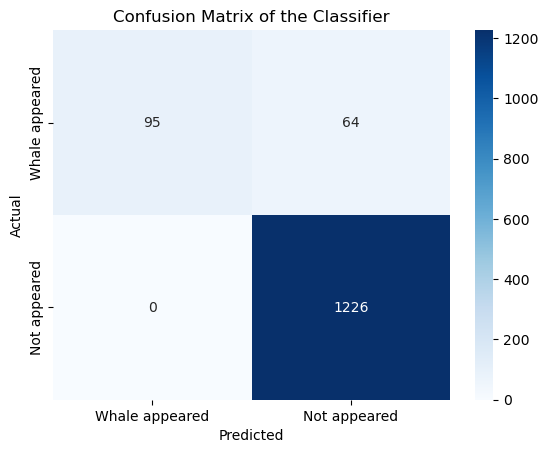

In [55]:
########################################
# visual_cm
########################################
def visual_cm(true_y, pred_y, labels = None):
    """
Creates a visualization of a confusion matrix.

PARAMETERS
----------
true_y : true values for the response variable
pred_y : predicted values for the response variable
labels : , default None
    """
    # visualizing the confusion matrix

    # setting labels
    lbls = labels
    

    # declaring a confusion matrix object
    cm = confusion_matrix(y_true = true_y,
                          y_pred = pred_y)


    # heatmap
    sns.heatmap(cm,
                annot       = True,
                xticklabels = lbls,
                yticklabels = lbls,
                cmap        = 'Blues',
                fmt         = 'g')


    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix of the Classifier')
    plt.show()
    
    
    
# calling the visual_cm function
visual_cm(true_y = y_train_2,
          pred_y = tree_model_valid_pred,
          labels = ['Whale appeared', 'Not appeared'])

## 4.2 Gradient Boosting Classifier Model

In [48]:
#INSTANTIATING Tuned Model
gbc_model = GradientBoostingClassifier()

# FITTING to the training data
gbc_model_fit = gbc_model.fit(x_train_1, y_train_1)


# PREDICTING on the response variable
gbc_model_train_pred = gbc_model_fit.predict(x_train_1)
gbc_model_valid_pred = gbc_model_fit.predict(x_train_2)


# SCORING the results (accuracy)
gbc_model_train_score = gbc_model.score(x_train_1, y_train_1).round(4) # training accuracy
gbc_model_valid_score = gbc_model.score(x_train_2, y_train_2).round(4) # validation accuracy

# SCORING the results (auc)
gbc_model_train_auc = roc_auc_score(y_true  = y_train_1,
                                y_score = gbc_model_train_pred).round(decimals = 4)

gbc_model_valid_auc = roc_auc_score(y_true  = y_train_2,
                                y_score = gbc_model_valid_pred).round(decimals = 4)

# displaying results
print('Training Accuracy:  ', gbc_model_train_score)
print('Validation Accuracy:', gbc_model_valid_score)
print('Training AUC:       ', gbc_model_train_auc)
print('Validation AUC:     ', gbc_model_valid_auc)

# print the gap
gbc_model_gap = abs(gbc_model_train_score - gbc_model_valid_score).round(4)
print('Gap :               ', gbc_model_gap)

Training Accuracy:   0.9424
Validation Accuracy: 0.9415
Training AUC:        0.7495
Validation AUC:      0.7453
Gap :                0.0009


## 4.3. Random Forest Model

In [49]:
#INSTANTIATING Tuned Model
model = RandomForestRegressor(n_estimators     = 200,
                              criterion        = 'squared_error',
                              max_depth        = 30,
                              min_samples_leaf = 10,
                              bootstrap        = True,
                              warm_start       = False,
                              random_state     = 219)

# FITTING to the training data
model_fit = model.fit(x_train_1, y_train_1)


# PREDICTING on the response variable
model_train_pred = model_fit.predict(x_train_1)
model_valid_pred = model_fit.predict(x_train_2)


# SCORING the results (accuracy)
model_train_score = model.score(x_train_1, y_train_1).round(4) # training accuracy
model_valid_score = model.score(x_train_2, y_train_2).round(4) # validation accuracy

# SCORING the results (auc)
model_train_auc = roc_auc_score(y_true  = y_train_1,
                                y_score = model_train_pred).round(decimals = 4)

model_valid_auc = roc_auc_score(y_true  = y_train_2,
                                y_score = model_valid_pred).round(decimals = 4)

# displaying results
print('Training Accuracy:  ', model_train_score)
print('Validation Accuracy:', model_valid_score)
print('Training AUC:       ', model_train_auc)
print('Validation AUC:     ', model_valid_auc)

# print the gap
model_gap = abs(model_train_score - model_valid_score).round(4)
print('Gap :               ', model_gap)

Training Accuracy:   0.6131
Validation Accuracy: 0.6234
Training AUC:        0.9538
Validation AUC:      0.9551
Gap :                0.0103


## 4.4 Unpruned GBR Model

In [50]:
#INSTANTIATING Tuned Model
rf_model = GradientBoostingRegressor(loss          = 'huber',
                                  learning_rate = 0.1,
                                  n_estimators  = 150,
                                  criterion     = 'friedman_mse',
                                  max_depth     = 8,
                                  warm_start    = False,
                                  random_state  = 219)

# FITTING to the training data
rf_model_fit = rf_model.fit(x_train_1, y_train_1)


# PREDICTING on the response variable
rf_model_train_pred = rf_model_fit.predict(x_train_1)
rf_model_valid_pred = rf_model_fit.predict(x_train_2)


# SCORING the results (accuracy)
rf_model_train_score = rf_model.score(x_train_1, y_train_1).round(4) # training accuracy
rf_model_valid_score = rf_model.score(x_train_2, y_train_2).round(4) # validation accuracy

# SCORING the results (auc)
rf_model_train_auc = roc_auc_score(y_true  = y_train_1,
                                y_score = rf_model_train_pred).round(decimals = 4)

rf_model_valid_auc = roc_auc_score(y_true  = y_train_2,
                                y_score = rf_model_valid_pred).round(decimals = 4)

# displaying results
print('Training Accuracy:  ', rf_model_train_score)
print('Validation Accuracy:', rf_model_valid_score)
print('Training AUC:       ', rf_model_train_auc)
print('Validation AUC:     ', rf_model_valid_auc)

# print the gap
rf_model_gap = abs(rf_model_train_score - rf_model_valid_score).round(4)
print('Gap :               ', rf_model_gap)

Training Accuracy:   0.5216
Validation Accuracy: 0.5453
Training AUC:        0.9528
Validation AUC:      0.9527
Gap :                0.0237


---
## Short Sum: 
---
### Predicting Killer Whale Appearances

This model aims to predict the appearances of killer whales based on a comprehensive set of factors. To enhance the model's predictive power, new features have been engineered. 

Key features include the range of start times, podcast rounds, geographical locations (US West, US East, Canada, Norway), seasonal information (Spring, Summer, Autumn, Winter), historical periods (Early Studies, Captivity Boom, Conservation Era, Current Era), and podcast frequency.

The ultimate goal is to create a robust predictive tool that contributes to our understanding and forecasting of killer whale appearances, incorporating insights from various dimensions including temporal, geographical, and historical contexts.

---
The Best Model is __Decision Tree Model.__

About the X-var decision:

1. If the goal is to achieve the highest overall accuracy, Set 2 might be preferred.

2. If the goal is for better interpretability or avoiding overfitting, and if the validation metrics are acceptable, Set 3 could be a reasonable choice.

